In [34]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [35]:
iris_data = datasets.load_iris()
flower_measurements = iris_data.data
flower_types = iris_data.target

flower_types = np.where(flower_types == 0, 1, -1)  # Setosa=1, others=-1

# only petal length and width (first two measurements)
flower_measurements = flower_measurements[:, :2]

X_train, X_test, y_train, y_test = train_test_split(
    flower_measurements, flower_types, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
class SVM:
    def __init__(self, step_size=0.01, reg_strength=0.01, max_iterations=1000):
        self.step_size = step_size
        self.reg_strength = reg_strength
        self.max_iterations = max_iterations
        self.weights = None
        self.bias = None

    def train(self, X, y):
        num_samples, num_features = X.shape

        self.weights = np.zeros(num_features)
        self.bias = 0

        # main training loop
        for iteration in range(self.max_iterations):
            for i in range(len(X)):
                current_sample = X[i]
                current_label = y[i]

                # Check if this sample is correctly classified with margin
                if (
                    current_label * (np.dot(current_sample, self.weights) - self.bias)
                    >= 1
                ):
                    # Update weights gently if correct
                    self.weights -= self.step_size * (
                        2 * self.reg_strength * self.weights
                    )
                else:
                    # Update more aggressively if wrong
                    self.weights -= self.step_size * (
                        2 * self.reg_strength * self.weights
                        - np.dot(current_sample, current_label)
                    )
                    self.bias -= self.step_size * current_label

    def predict(self, X):
        decision_values = np.dot(X, self.weights) - self.bias
        return np.sign(decision_values)

    def calculate_loss(self, X, y):
        total_loss = 0
        for i in range(len(X)):
            margin = y[i] * (np.dot(self.weights, X[i]) - self.bias)
            total_loss += max(0, 1 - margin)
        # Add regularization term
        return total_loss + self.reg_strength * np.dot(self.weights, self.weights)

In [37]:
flower_classifier = SVM(step_size=0.01, reg_strength=0.01, max_iterations=1000)
flower_classifier.train(X_train, y_train)

train_predictions = flower_classifier.predict(X_train)
test_predictions = flower_classifier.predict(X_test)

train_accuracy = np.mean(train_predictions == y_train)
test_accuracy = np.mean(test_predictions == y_test)

print(f"Got {train_accuracy*100:.1f}% right on training flowers")
print(f"Got {test_accuracy*100:.1f}% right on test flowers")

current_loss = flower_classifier.calculate_loss(X_train, y_train)
print(f"Current loss value: {current_loss:.2f}")

Got 99.2% right on training flowers
Got 100.0% right on test flowers
Current loss value: 4.55


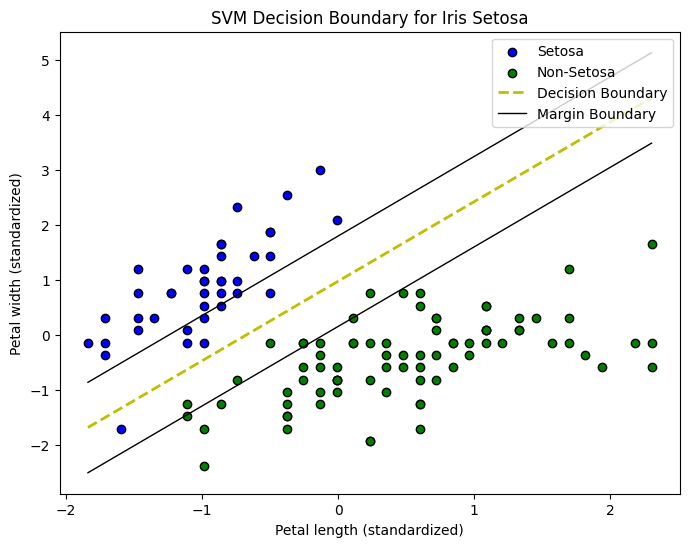

In [38]:
def plot_decision_boundary():
    def calculate_boundary(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    plt.figure(figsize=(8, 6))

    setosa = plt.scatter(
        X_train[y_train == 1, 0],
        X_train[y_train == 1, 1],
        c="blue",
        label="Setosa",
        edgecolors="k",
    )
    non_setosa = plt.scatter(
        X_train[y_train == -1, 0],
        X_train[y_train == -1, 1],
        c="green",
        label="Non-Setosa",
        edgecolors="k",
    )

    min_x = np.min(X_train[:, 0])
    max_x = np.max(X_train[:, 0])

    boundary_y1 = calculate_boundary(
        min_x, flower_classifier.weights, flower_classifier.bias, 0
    )
    boundary_y2 = calculate_boundary(
        max_x, flower_classifier.weights, flower_classifier.bias, 0
    )
    (decision_line,) = plt.plot(
        [min_x, max_x],
        [boundary_y1, boundary_y2],
        "y--",
        linewidth=2,
        label="Decision Boundary",
    )

    margin1_y1 = calculate_boundary(
        min_x, flower_classifier.weights, flower_classifier.bias, -1
    )
    margin1_y2 = calculate_boundary(
        max_x, flower_classifier.weights, flower_classifier.bias, -1
    )

    margin2_y1 = calculate_boundary(
        min_x, flower_classifier.weights, flower_classifier.bias, 1
    )
    margin2_y2 = calculate_boundary(
        max_x, flower_classifier.weights, flower_classifier.bias, 1
    )

    (margin_line1,) = plt.plot(
        [min_x, max_x],
        [margin1_y1, margin1_y2],
        "k",
        linewidth=1,
        label="Margin Boundary",
    )
    plt.plot([min_x, max_x], [margin2_y1, margin2_y2], "k", linewidth=1)

    plt.xlabel("Petal length (standardized)")
    plt.ylabel("Petal width (standardized)")
    plt.title("SVM Decision Boundary for Iris Setosa")
    plt.legend(
        handles=[setosa, non_setosa, decision_line, margin_line1], loc="upper right"
    )

    plt.show()

plot_decision_boundary()